In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [3]:
#New for me Whenever you see the new libraries and packages just try to see them wisely
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
dataset=pd.read_csv("fifa_data.csv")
dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
dataset.shape

(18207, 89)

In [6]:
# Change settings to display all columns
#to see the all columns that are there in your dataset
pd.set_option('display.max_columns', None)

In [7]:
dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
# For this application, we only want the players name and ID, along with their skill scores and position.
# Drop unwanted columns for the purpose of this application
# Note we dropped the Goalkeeping skills attributes, this would make it too easy for our model. 
# Plus in a real world scenario, these skills would be hard to measure for ALL players.

In [9]:
# For this application, we only want the players name and ID, along with their skill scores and position.
# Drop unwanted columns for the purpose of this application
# Note we dropped the Goalkeeping skills attributes, this would make it too easy for our model. 
# Plus in a real world scenario, these skills would be hard to measure for ALL players.
dataset.drop(['Unnamed: 0', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value',
              'Wage','Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
              'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
              'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
              'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GKDiving', 'GKHandling', 
              'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'], axis = 1,inplace=True)

In [10]:
dataset.head()

,ID,Name,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,20801,Cristiano Ronaldo,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,190871,Neymar Jr,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,193080,De Gea,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,192985,K. De Bruyne,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [11]:
#Now if we check the shape it is extremely different as we just removed the unnecessary columns from the dataset
#and more than 50 we remove from dataset
dataset.isnull().sum()

ID                  0
Name                0
Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [12]:
#checking if any null value is there
dataset.isnull().any()

ID                 False
Name               False
Position            True
Crossing            True
Finishing           True
HeadingAccuracy     True
ShortPassing        True
Volleys             True
Dribbling           True
Curve               True
FKAccuracy          True
LongPassing         True
BallControl         True
Acceleration        True
SprintSpeed         True
Agility             True
Reactions           True
Balance             True
ShotPower           True
Jumping             True
Stamina             True
Strength            True
LongShots           True
Aggression          True
Interceptions       True
Positioning         True
Vision              True
Penalties           True
Composure           True
Marking             True
StandingTackle      True
SlidingTackle       True
dtype: bool

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 32 columns):
ID                 18207 non-null int64
Name               18207 non-null object
Position           18147 non-null object
Crossing           18159 non-null float64
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength     

In [14]:
#dropping the null observation and yes we can do this because the data set is large and we have a lot of observation
dataset.dropna(inplace=True)

In [15]:
dataset.shape

(18147, 32)

In [16]:
dataset.isnull().sum()

ID                 0
Name               0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
dtype: int64

In [17]:
dataset.columns

Index(['ID', 'Name', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [18]:
dataset["Position"].head()

0     RF
1     ST
2     LW
3     GK
4    RCM
Name: Position, dtype: object

In [19]:
dataset.corr()

,ID,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
ID,1.000000,-0.132098,-0.082393,-0.106674,-0.136235,-0.160137,-0.030440,-0.169685,-0.199647,-0.186886,-0.100189,0.133079,0.132224,-0.019946,-0.408498,0.048364,-0.166065,-0.169402,-0.053940,-0.259937,-0.161554,-0.228189,-0.160530,-0.088493,-0.215173,-0.140586,-0.384429,-0.110149,-0.085817,-0.068263
Crossing,-0.132098,1.000000,0.655445,0.469579,0.809838,0.690417,0.856716,0.833251,0.761331,0.756569,0.841006,0.668509,0.645726,0.698586,0.389563,0.618297,0.705873,0.135571,0.672636,-0.029448,0.742232,0.473639,0.427783,0.783272,0.685058,0.646193,0.575466,0.443278,0.428954,0.409974
Finishing,-0.082393,0.655445,1.000000,0.473478,0.662078,0.882724,0.824390,0.759414,0.697784,0.512963,0.788455,0.606565,0.593997,0.644425,0.331580,0.523742,0.815714,0.097532,0.510880,-0.009503,0.877878,0.243145,-0.020481,0.888841,0.697439,0.837946,0.533555,0.024582,-0.032828,-0.071624
HeadingAccuracy,-0.106674,0.469579,0.473478,1.000000,0.640238,0.505759,0.550736,0.440917,0.407794,0.510912,0.658193,0.329840,0.379588,0.260667,0.325893,0.168883,0.611736,0.380146,0.634618,0.486947,0.506759,0.692888,0.548734,0.533830,0.275480,0.551954,0.507229,0.583267,0.561103,0.533643
ShortPassing,-0.136235,0.809838,0.662078,0.640238,1.000000,0.698470,0.843862,0.775549,0.736849,0.895679,0.911520,0.566191,0.555102,0.613399,0.483048,0.533350,0.771997,0.197643,0.716882,0.133638,0.761926,0.611756,0.543585,0.758032,0.713470,0.676389,0.685199,0.559946,0.541348,0.508813
Volleys,-0.160137,0.690417,0.882724,0.505759,0.698470,1.000000,0.809637,0.807275,0.749743,0.571071,0.794954,0.572192,0.557025,0.625068,0.393883,0.513613,0.832660,0.126228,0.527301,0.029615,0.868278,0.330437,0.088610,0.848336,0.699472,0.829509,0.595375,0.121251,0.072969,0.035662
Dribbling,-0.030440,0.856716,0.824390,0.550736,0.843862,0.809637,1.000000,0.842726,0.753737,0.722492,0.938977,0.748480,0.726953,0.765377,0.369368,0.663114,0.804929,0.143115,0.686475,-0.033614,0.843663,0.441250,0.296121,0.896940,0.730144,0.769778,0.597511,0.336319,0.301329,0.274031
Curve,-0.169685,0.833251,0.759414,0.440917,0.775549,0.807275,0.842726,1.000000,0.861291,0.710865,0.829612,0.607439,0.578795,0.682232,0.413500,0.587001,0.792215,0.111961,0.590297,-0.035836,0.835367,0.399503,0.273886,0.811186,0.744762,0.752091,0.616585,0.289706,0.261552,0.232997
FKAccuracy,-0.199647,0.761331,0.697784,0.407794,0.736849,0.749743,0.753737,0.861291,1.000000,0.703781,0.759623,0.498350,0.466797,0.590235,0.398412,0.521530,0.754406,0.082173,0.537452,-0.018996,0.802749,0.396202,0.295454,0.729707,0.717264,0.734545,0.585231,0.298024,0.279177,0.247981
LongPassing,-0.186886,0.756569,0.512963,0.510912,0.895679,0.571071,0.722492,0.710865,0.703781,1.000000,0.788662,0.442870,0.426881,0.523848,0.461479,0.462477,0.671647,0.154723,0.635755,0.114279,0.668004,0.590683,0.597053,0.614600,0.698163,0.542662,0.645833,0.587481,0.587650,0.562424


In [20]:
dataset.describe()

,ID,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,214279.818868,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,64.612829,64.726236,63.501295,61.839147,63.964292,55.465201,65.091034,63.221579,65.318620,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336
std,29970.319078,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,14.930320,14.651776,14.768956,9.011056,14.136073,17.235534,11.822327,15.896381,12.552479,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961
min,16.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000
25%,200305.500000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,221740.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000
75%,236512.500000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,246620.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


In [21]:
dataset.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [22]:
# Convert the current 27 positions into 4 main position disciplines, Attacker, Midfielder, Defender, Goalkeeper
att = dict.fromkeys(['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF'], 'Attacker')
mid = dict.fromkeys(['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'RDM', 'LDM', 'RAM', 'LAM'], 'Midfielder')
dfnc = dict.fromkeys(['CB', 'LB', 'RB', 'RCB', 'LCB', 'RWB', 'LWB' ], 'Defender')
#df.Position.replace('GK', 'Goalkeeper', inplace=True)
#df.Position.replace(att, inplace=True)
#df.Position.replace(mid, inplace=True)
#df.Position.replace(dfnc, inplace=True)

# Confirm the changes
#df.Position.value_counts()

In [23]:
att

{'ST': 'Attacker',
 'LW': 'Attacker',
 'RW': 'Attacker',
 'LS': 'Attacker',
 'RS': 'Attacker',
 'CF': 'Attacker',
 'RF': 'Attacker',
 'LF': 'Attacker'}

In [24]:
mid

{'CM': 'Midfielder',
 'RM': 'Midfielder',
 'LM': 'Midfielder',
 'CAM': 'Midfielder',
 'CDM': 'Midfielder',
 'LCM': 'Midfielder',
 'RCM': 'Midfielder',
 'RDM': 'Midfielder',
 'LDM': 'Midfielder',
 'RAM': 'Midfielder',
 'LAM': 'Midfielder'}

In [25]:
dfnc


{'CB': 'Defender',
 'LB': 'Defender',
 'RB': 'Defender',
 'RCB': 'Defender',
 'LCB': 'Defender',
 'RWB': 'Defender',
 'LWB': 'Defender'}

In [26]:
dataset.Position.replace('GK', 'Goalkeeper', inplace=True)
dataset.Position.replace(att, inplace=True)
#df.Position.replace(mid, inplace=True)
#df.Position.replace(dfnc, inplace=True)

# Confirm the changes
#df.Position.value_counts()

In [27]:
dataset.Position

0          Attacker
1          Attacker
2          Attacker
3        Goalkeeper
4               RCM
            ...    
18202            CM
18203      Attacker
18204      Attacker
18205      Attacker
18206            CM
Name: Position, Length: 18147, dtype: object

In [28]:
dataset.Position.replace(mid, inplace=True)
dataset.Position.replace(dfnc, inplace=True)

# Confirm the changes
dataset.Position.value_counts()

Midfielder    6838
Defender      5866
Attacker      3418
Goalkeeper    2025
Name: Position, dtype: int64

In [29]:
dataset.duplicated('ID')

0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Length: 18147, dtype: bool

In [30]:
dataset.duplicated('ID').sum()

0

In [31]:
#Some  data Exploration
#Because data exploration is very necessary

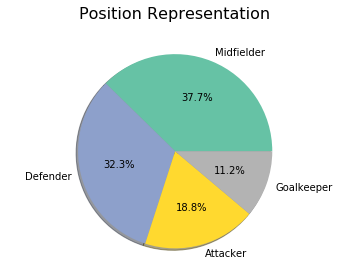

In [32]:
# Create a pie chart showing the percentage of each position represented in the dataset
dataset.Position.value_counts().plot(kind = 'pie',
                                autopct = '%0.1f%%',
                                shadow = True,
                                cmap = 'Set2'
                                )
plt.title('Position Representation\n', fontsize = 16 )
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.show()

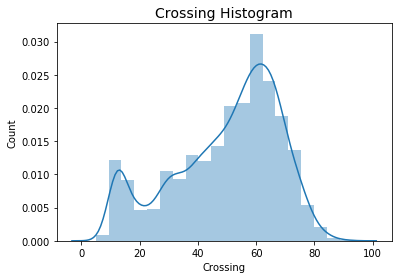

Crossing
count    18147.000000
mean        49.738414
std         18.364255
min          5.000000
25%         38.000000
50%         54.000000
75%         64.000000
max         93.000000
Name: Crossing, dtype: float64





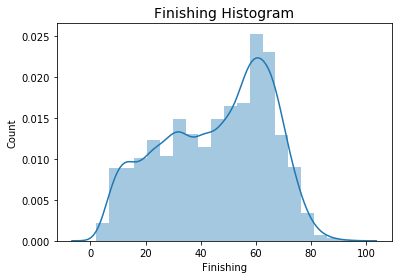

Finishing
count    18147.000000
mean        45.550229
std         19.527445
min          2.000000
25%         30.000000
50%         49.000000
75%         62.000000
max         95.000000
Name: Finishing, dtype: float64





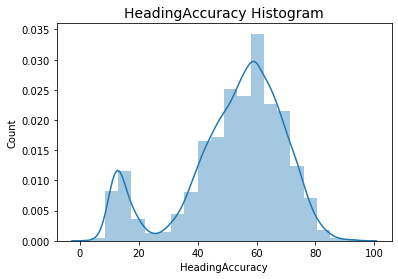

HeadingAccuracy
count    18147.000000
mean        52.300766
std         17.381753
min          4.000000
25%         44.000000
50%         56.000000
75%         64.000000
max         94.000000
Name: HeadingAccuracy, dtype: float64





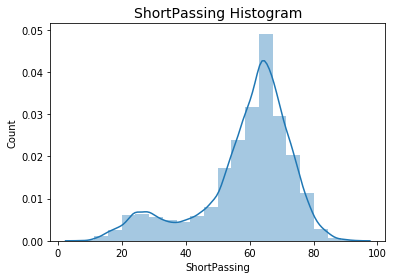

ShortPassing
count    18147.000000
mean        58.695432
std         14.696075
min          7.000000
25%         54.000000
50%         62.000000
75%         68.000000
max         93.000000
Name: ShortPassing, dtype: float64





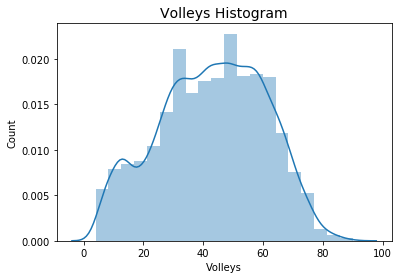

Volleys
count    18147.000000
mean        42.912217
std         17.695900
min          4.000000
25%         30.000000
50%         44.000000
75%         57.000000
max         90.000000
Name: Volleys, dtype: float64





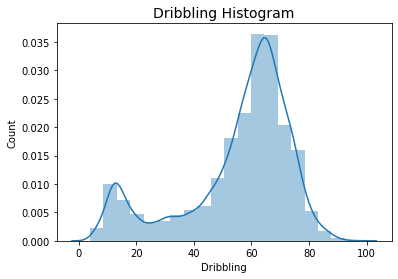

Dribbling
count    18147.000000
mean        55.375158
std         18.912224
min          4.000000
25%         49.000000
50%         61.000000
75%         68.000000
max         97.000000
Name: Dribbling, dtype: float64





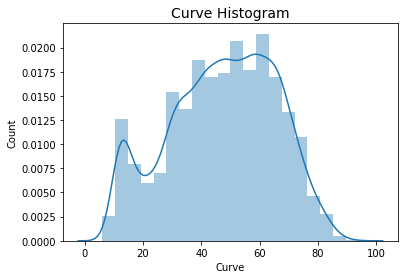

Curve
count    18147.000000
mean        47.176283
std         18.396009
min          6.000000
25%         34.000000
50%         48.000000
75%         62.000000
max         94.000000
Name: Curve, dtype: float64





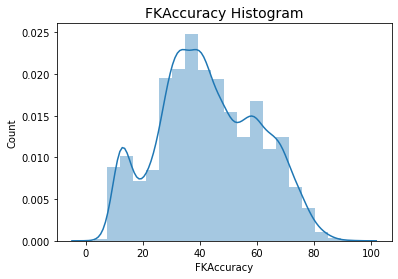

FKAccuracy
count    18147.000000
mean        42.866038
std         17.480034
min          3.000000
25%         31.000000
50%         41.000000
75%         57.000000
max         94.000000
Name: FKAccuracy, dtype: float64





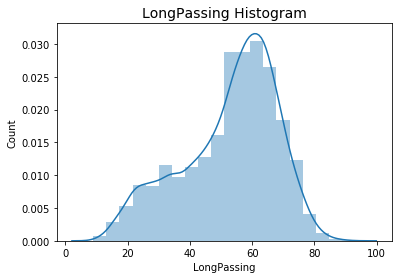

LongPassing
count    18147.000000
mean        52.721386
std         15.325211
min          9.000000
25%         43.000000
50%         56.000000
75%         64.000000
max         93.000000
Name: LongPassing, dtype: float64





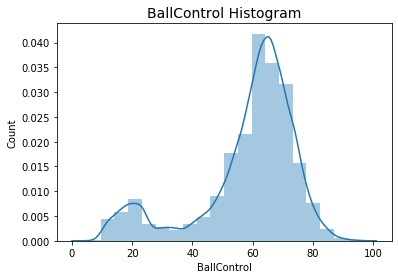

BallControl
count    18147.000000
mean        58.374828
std         16.685643
min          5.000000
25%         54.000000
50%         63.000000
75%         69.000000
max         96.000000
Name: BallControl, dtype: float64





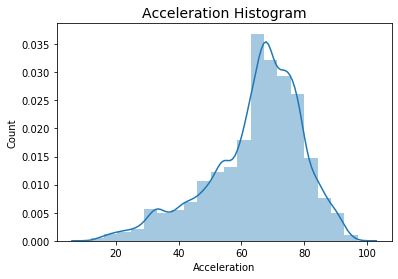

Acceleration
count    18147.000000
mean        64.612829
std         14.930320
min         12.000000
25%         57.000000
50%         67.000000
75%         75.000000
max         97.000000
Name: Acceleration, dtype: float64





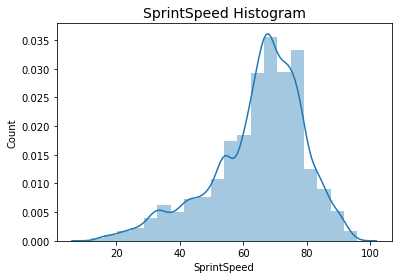

SprintSpeed
count    18147.000000
mean        64.726236
std         14.651776
min         12.000000
25%         57.000000
50%         67.000000
75%         75.000000
max         96.000000
Name: SprintSpeed, dtype: float64





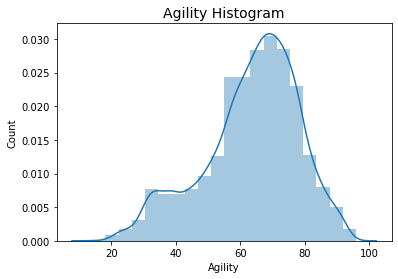

Agility
count    18147.000000
mean        63.501295
std         14.768956
min         14.000000
25%         55.000000
50%         66.000000
75%         74.000000
max         96.000000
Name: Agility, dtype: float64





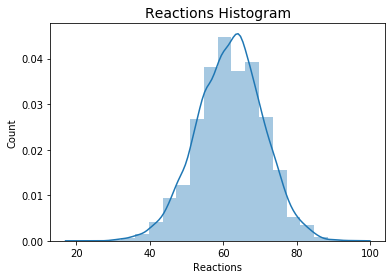

Reactions
count    18147.000000
mean        61.839147
std          9.011056
min         21.000000
25%         56.000000
50%         62.000000
75%         68.000000
max         96.000000
Name: Reactions, dtype: float64





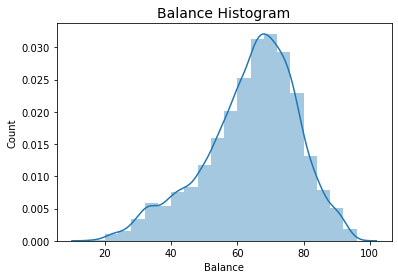

Balance
count    18147.000000
mean        63.964292
std         14.136073
min         16.000000
25%         56.000000
50%         66.000000
75%         74.000000
max         96.000000
Name: Balance, dtype: float64





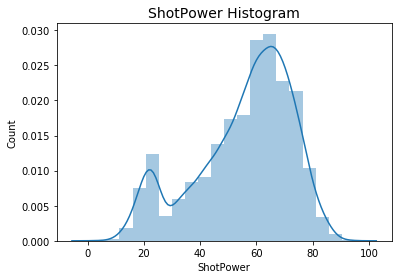

ShotPower
count    18147.000000
mean        55.465201
std         17.235534
min          2.000000
25%         45.000000
50%         59.000000
75%         68.000000
max         95.000000
Name: ShotPower, dtype: float64





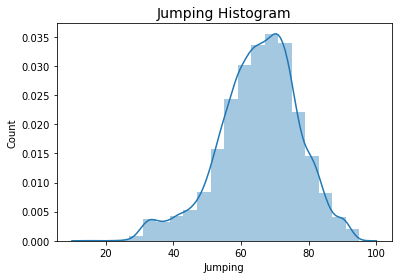

Jumping
count    18147.000000
mean        65.091034
std         11.822327
min         15.000000
25%         58.000000
50%         66.000000
75%         73.000000
max         95.000000
Name: Jumping, dtype: float64





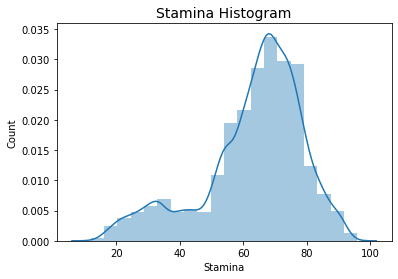

Stamina
count    18147.000000
mean        63.221579
std         15.896381
min         12.000000
25%         56.000000
50%         66.000000
75%         74.000000
max         96.000000
Name: Stamina, dtype: float64





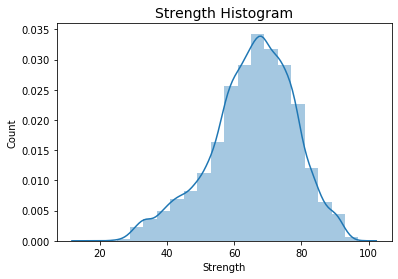

Strength
count    18147.000000
mean        65.318620
std         12.552479
min         17.000000
25%         58.000000
50%         67.000000
75%         74.000000
max         97.000000
Name: Strength, dtype: float64





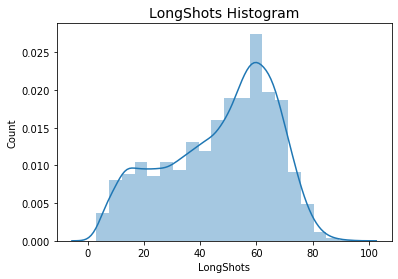

LongShots
count    18147.000000
mean        47.113187
std         19.263142
min          3.000000
25%         33.000000
50%         51.000000
75%         62.000000
max         94.000000
Name: LongShots, dtype: float64





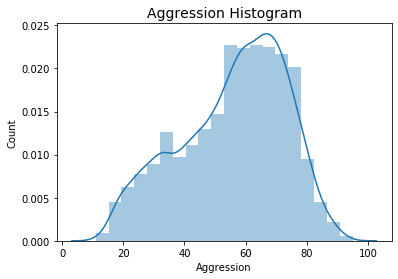

Aggression
count    18147.000000
mean        55.876068
std         17.366534
min         11.000000
25%         44.000000
50%         59.000000
75%         69.000000
max         95.000000
Name: Aggression, dtype: float64





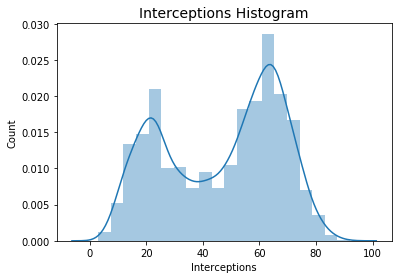

Interceptions
count    18147.000000
mean        46.702761
std         20.697462
min          3.000000
25%         26.000000
50%         52.000000
75%         64.000000
max         92.000000
Name: Interceptions, dtype: float64





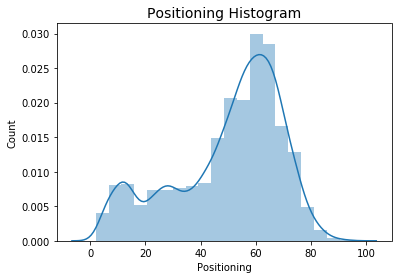

Positioning
count    18147.000000
mean        49.962198
std         19.530469
min          2.000000
25%         38.000000
50%         55.000000
75%         64.000000
max         95.000000
Name: Positioning, dtype: float64





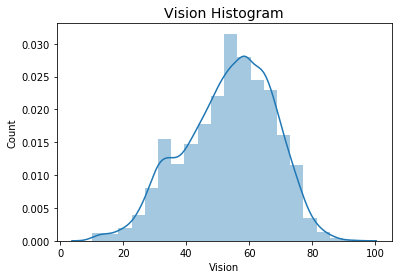

Vision
count    18147.000000
mean        53.407781
std         14.146594
min         10.000000
25%         44.000000
50%         55.000000
75%         64.000000
max         94.000000
Name: Vision, dtype: float64





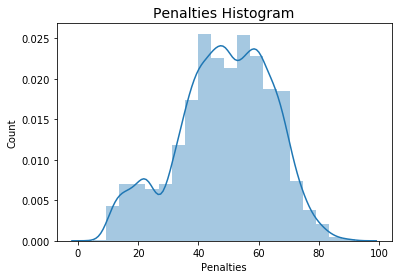

Penalties
count    18147.000000
mean        48.546371
std         15.703113
min          5.000000
25%         39.000000
50%         49.000000
75%         60.000000
max         92.000000
Name: Penalties, dtype: float64





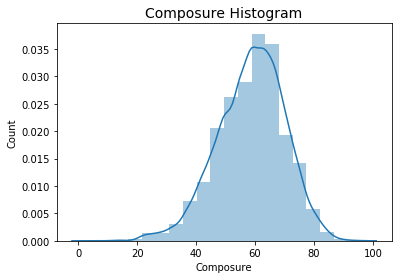

Composure
count    18147.000000
mean        58.651127
std         11.437138
min          3.000000
25%         51.000000
50%         60.000000
75%         67.000000
max         96.000000
Name: Composure, dtype: float64





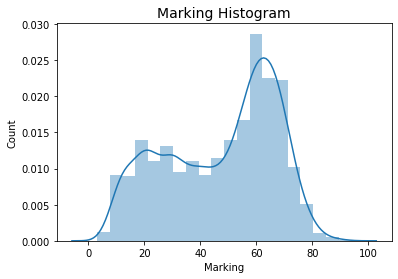

Marking
count    18147.000000
mean        47.286053
std         19.900450
min          3.000000
25%         30.000000
50%         53.000000
75%         64.000000
max         94.000000
Name: Marking, dtype: float64





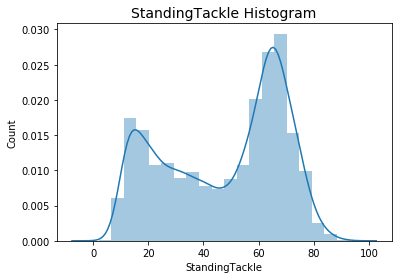

StandingTackle
count    18147.000000
mean        47.701879
std         21.663630
min          2.000000
25%         27.000000
50%         55.000000
75%         66.000000
max         93.000000
Name: StandingTackle, dtype: float64





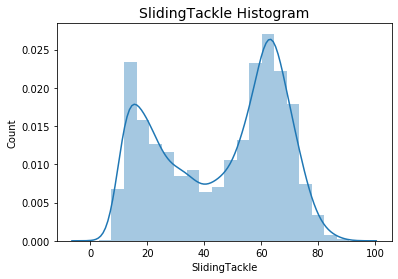

SlidingTackle
count    18147.000000
mean        45.666336
std         21.287961
min          3.000000
25%         24.000000
50%         52.000000
75%         64.000000
max         91.000000
Name: SlidingTackle, dtype: float64





In [33]:
# Create a histogram for each column and also return min, max, mean and median.
# Each of these columns should range between 0 and 100.
# The histogram and the min, max, mean values should provide us a quick way to validate the data.
# Use a for loop to cycle through the attributes
#distplot gives you the distribution plot
#and also gives the line if parameter kde is not False
for column in dataset.iloc[:,3:]:
    sns.distplot(dataset[column], #kde = False, 
                 bins = 20)
    plt.title(str(dataset[column].name) + " Histogram", fontsize = 14)
    plt.ylabel("Count")
    plt.show()
    print (dataset[column].name) 
    print (dataset[column].describe())
    print ("\n\n")

In [34]:
dataset.columns

Index(['ID', 'Name', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [35]:
#By identifying the histograms that most represent a normal distribution, we discover that those 
#attributes are Reactions, Balance, Strength and Jumping. These four attributes are quite ambiguous when trying to 
#link them to a specific position, however they are common traits for professional athletes of many sports.

In [36]:
#The six histograms that least represent a normal distribution are Finishing,
#HeadingAccuracy, Interceptions, Marking, SlidingTackle and StandingTackle.
#Finishing and HeadingAccuracy are skills that are specialties of attackers. Interceptions, 
#Marking, SlidingTackle and StandingTackle are four key skill specialties for defenders.
#These features may be more useful in our modelling to determine position.

In [37]:
#Time for more data visualization 
#and this time seaborn is our helping hand

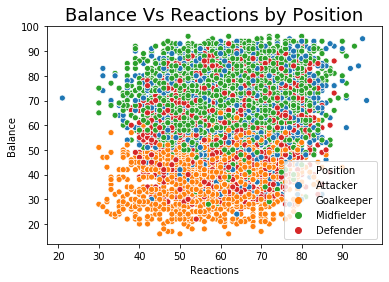

In [39]:
sns.scatterplot(x="Reactions",y="Balance",hue="Position",data=dataset)
plt.title('Balance Vs Reactions by Position', fontsize = 18)
plt.show()

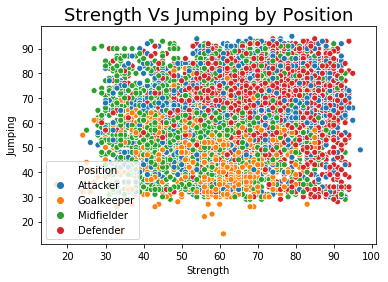

In [40]:
sns.scatterplot(x="Strength",y="Jumping",hue="Position",data=dataset)
plt.title("Strength Vs Jumping by Position",fontsize=18)
plt.show()

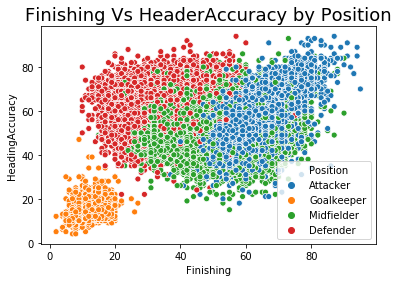

In [41]:
sns.scatterplot(x="Finishing",y="HeadingAccuracy",hue="Position",data=dataset)
plt.title("Finishing Vs HeaderAccuracy by Position",fontsize=18)
plt.show()

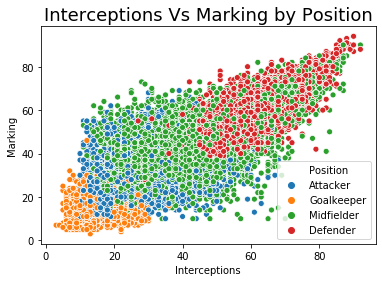

In [44]:
# Create a scatterplot
sns.scatterplot(x = "Interceptions", 
                y = "Marking", 
                hue = "Position", 
                data = dataset,
                )
plt.title('Interceptions Vs Marking by Position', fontsize = 18)
plt.show()

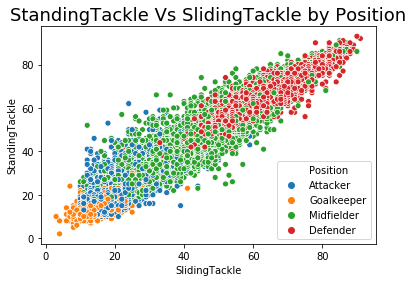

In [46]:
# Create a scatterplot
sns.scatterplot(x = "SlidingTackle", 
                y = "StandingTackle", 
                hue = "Position", 
                data = dataset,
                )
plt.title('StandingTackle Vs SlidingTackle by Position', fontsize = 18)
plt.show()

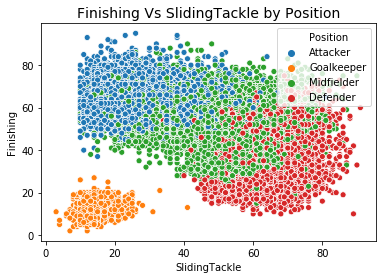

In [47]:
# Create a scatterplot
sns.scatterplot(x = "SlidingTackle", 
                y = "Finishing", 
                hue = "Position", 
                data = dataset,
                )
plt.title('Finishing Vs SlidingTackle by Position', fontsize = 14)
plt.show()

In [ ]:
'''By plotting the position specific skills against each other, 
clear Position clusters begin to appear. This re-affirms 
that these attributes should provide better performance in predicting Position'''

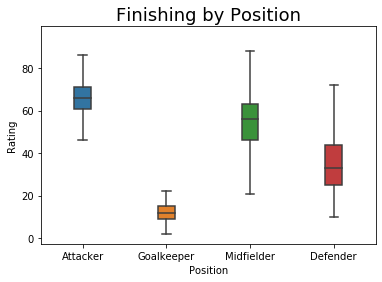

In [48]:
# Create box plots for 2 key skill ratings
# Outliers removed for cleaner plots

sns.boxplot(x = 'Position',
            y = 'Finishing', 
            data = dataset,
            width = 0.2,
            fliersize = 0
            )
plt.title("Finishing by Position", fontsize = 18)
plt.ylabel("Rating")
plt.show()

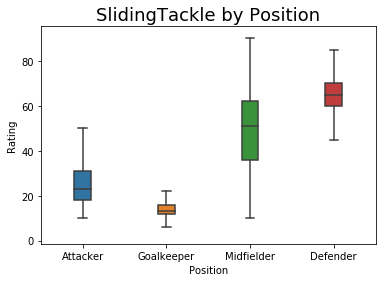

In [49]:
sns.boxplot(x = 'Position',
            y = 'SlidingTackle', 
            data = dataset,
            width = 0.2,
            fliersize = 0
            )
plt.title("SlidingTackle by Position", fontsize = 18)
plt.ylabel("Rating")
plt.show()

In [50]:
'''The boxplots show the skills Finishing and SlidingTackle and how they are key attributes for Attackers
and Defenders. Note the whiskers of the Midfielder span 
higher than the Attacker for Finishing and Higher than the Defender for 
SlidingTackle. This supports the hypothesis that some Midfielders 
are specialists at attacking and defensive roles. This can lead to 
difficulty in accurately defining a midfielder in our model. We can see this further 
looking at the below contoured Kernel Density Estimation Matrix for the 4 key skills.'''

'The boxplots show the skills Finishing and SlidingTackle and how they are key attributes for Attackers\nand Defenders. Note the whiskers of the Midfielder span \nhigher than the Attacker for Finishing and Higher than the Defender for \nSlidingTackle. This supports the hypothesis that some Midfielders \nare specialists at attacking and defensive roles. This can lead to \ndifficulty in accurately defining a midfielder in our model. We can see this further \nlooking at the below contoured Kernel Density Estimation Matrix for the 4 key skills.'

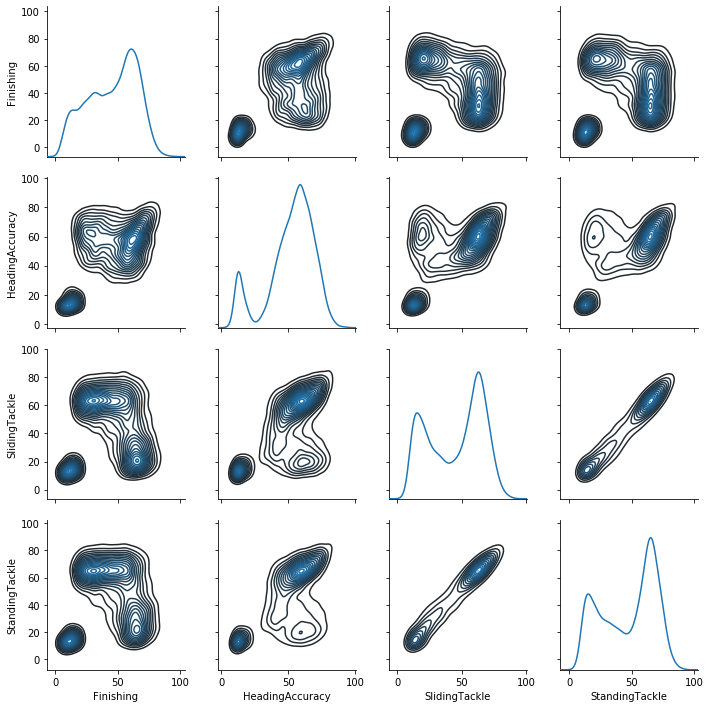

In [57]:
# Create a subset based on 4 specialised skills
# Plot the 4 skills in a kde matrix to try an identify clusters
special_skills = dataset[['Finishing', 'HeadingAccuracy','SlidingTackle', 'StandingTackle']]
g = sns.PairGrid(special_skills)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 20)
plt.show()

In [ ]:
'''This matrix shows three key clusters, most likely Goalkeeper, Attacker and Defender. The Midfielder cluster 
though is unclear. This further adds to the hypothesis that Midfielders are multi skilled
players whose skills range from attacking to defending. To compare, below is the matrix for
the 4 physical attributes that are common to most athletes. Note the lack of cluster division.'''

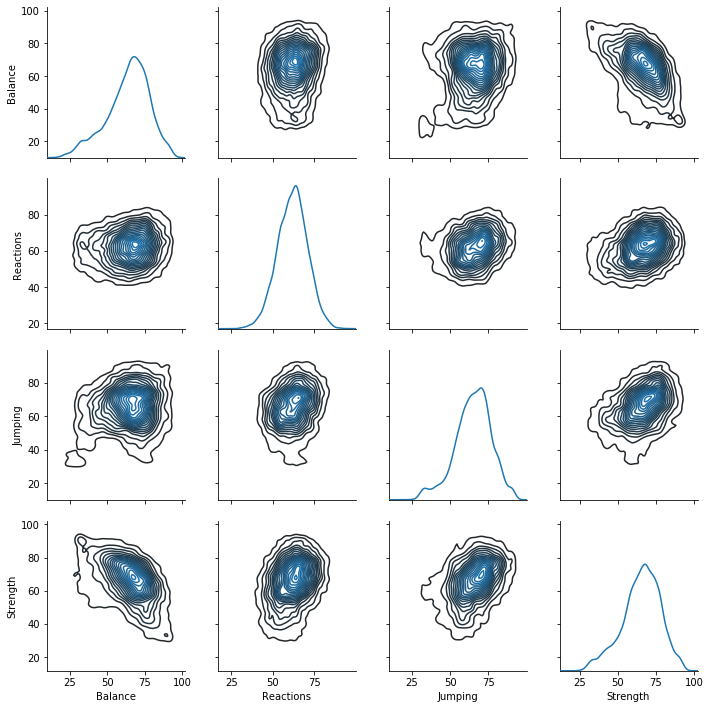

In [59]:
# Create a subset based on 4 general skills
# Plot the 4 skills in a kde matrix to try an identify clusters
general_skills = dataset[['Balance', 'Reactions', 'Jumping', 'Strength']]
g = sns.PairGrid(general_skills)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 20)
plt.show()

In [60]:
'''this technique is  used to make clusters out of the distribution that is given and you can make 
after making scatter plot between many attributes just like above very very important technique'''
#more levels better clusters means dense and good quality

'this technique is  used to make clusters out of the distribution that is given and you can make \nafter making scatter plot between many attributes just like above very very important technique'

In [61]:
#Now we have insights about the data and now we can proceed with the data modelling techniques
dataset.dtypes

ID                   int64
Name                object
Position            object
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
dtype: object

In [62]:
dataset.columns

Index(['ID', 'Name', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [64]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']
#you can do this way also 
#or you can use iloc function
#X=dataset.iloc[:,3:].values
# Assign the feature data
X = dataset[feature_cols]

# Assign the outcomes
#y=df[:,2].values
y = dataset.Position

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1984)

In [65]:
X

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [66]:
y.head()

0      Attacker
1      Attacker
2      Attacker
3    Goalkeeper
4    Midfielder
Name: Position, dtype: object

In [67]:
#It is very important keep this in mind

In [ ]:
'''Identify the best max_depth value of a tree Keep the max value at 5 as we want to minimise the nodes significantly'''

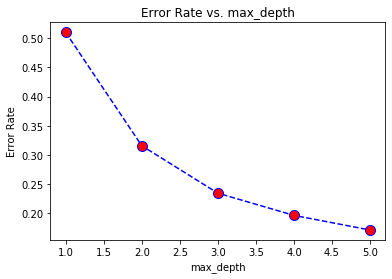

In [71]:
# Identify the best value for max_depth
error_rate = []

# Set the range of potential max_depth
# Run clf for each max_depth in the range
for i in range(1,6):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = i, # Default None
                                 min_samples_split = 2, # Default 2
                                 min_samples_leaf = 1 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a max_depth value
plt.plot(range(1,6), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 10)

plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

In [72]:
#It means 5 is the best option

In [74]:
#Now check min_samples_split, we want the highest value for the lowest error to minimise overfitting
#if there are large number of splits then there will be definitely be overfitting on the training data and
#there are poor results on the test data

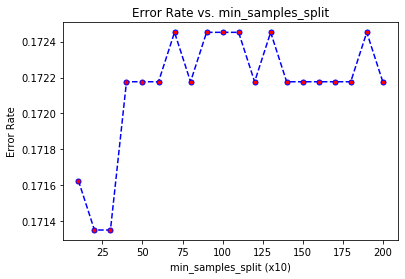

In [75]:
# Identify the best value for min_samples_split
error_rate = []

# Set the range of potential min_samples_split
# Run clf for each mmin_samples_split in the range
for i in range(10,210,10):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = i, # Default 2
                                 min_samples_leaf = 1 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a min_samples_split value
plt.plot(range(10,210,10), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. min_samples_split')
plt.xlabel('min_samples_split (x10)')
plt.ylabel('Error Rate')
plt.show()

In [76]:
#min_sample_split chosen is 20 by examining the error rate and all

In [77]:
#Now check min_samples_leaf, we want the highest value for the lowest error to minimise overfitting
#it is also the same means we should we maximize this hyperparameters so as to reduced the overfiiting 
#which is necesary

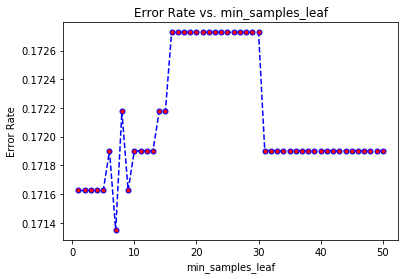

In [78]:
# Identify the best value for min_samples_leaf
error_rate = []

# Set the range of potential min_samples_leaf
# Run clf for each min_samples_leaf in the range
for i in range(1,51):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = 20, # Default 2
                                 min_samples_leaf = i # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a min_samples_leaf value
plt.plot(range(1,51), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Error Rate')
plt.show()

In [79]:
#min_sample_leaf chosen is 5

In [80]:
#this is really very important that is how many feature we will take so as to
#make the best model out of all
#similarly just find the value of max_features value

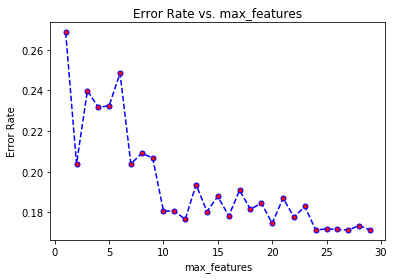

In [85]:
from sklearn import metrics
# Identify the best value for max_features
error_rate = []

# Set the range of potential max_features
# Run clf for each max_features in the range
for i in range(1,30):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = i, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = 20, # Default 2
                                 min_samples_leaf = 5 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a max_features value
plt.plot(range(1,30), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Error Rate')
plt.show()

In [82]:
#Very good insight we get from this graph that 23 or 22 is the best number of features we can choose
#max_features chosen is 23

In [83]:
#Now original modelling you will see
#in which we first make the Decision Tree classifier using default Parameters
#Then using tuned Parameters that we get

In [86]:
# Build the Decision Tree Model
clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                             max_features = None, # Default None
                             max_depth = None, # Default None
                             min_samples_split = 2, # Default 2
                             min_samples_leaf = 1 # Default 1 
                             )

# Train the model on the training set
fit = clf.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(clf, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

# Set the model node count to a variable
nds = clf.tree_.node_count

print ("Model Accuracy: ",str(round(acc*100,2))+"%")
print ("Cross Validation Accuracy: ",str(round(cvm*100,2))+"%")
print ("Model Fitting: ",str(round(dif*100,2))+"%",underover)
print ("Number of Nodes in Model: ",nds)
print ("Error Rate: ",str(round(err*100, 2))+"%")
print ("\n\n\nConfusion Matrix: \n\n",cm)
print ("\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

Model Accuracy:  81.52%
Cross Validation Accuracy:  79.5%
Model Fitting:  2.02% Overfitted
Number of Nodes in Model:  2711
Error Rate:  18.48%



Confusion Matrix: 

 [[ 516    5    0  185]
 [   4  988    0  142]
 [   0    1  401    0]
 [ 176  158    0 1054]]



Classification Report:

               precision    recall  f1-score   support

    Attacker       0.74      0.73      0.74       706
    Defender       0.86      0.87      0.86      1134
  Goalkeeper       1.00      1.00      1.00       402
  Midfielder       0.76      0.76      0.76      1388

    accuracy                           0.82      3630
   macro avg       0.84      0.84      0.84      3630
weighted avg       0.81      0.82      0.81      3630



In [87]:
# Build the Decision Tree Model
clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                             max_features = 23, # Default None
                             max_depth = 5, # Default None
                             min_samples_split = 20, # Default 2
                             min_samples_leaf = 5 # Default 1 
                             )

# Train the model on the training set
fit = clf.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(clf, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

# Set the model node count to a variable
nds = clf.tree_.node_count

print ("Model Accuracy: ",str(round(acc*100,2))+"%")
print ("Cross Validation Accuracy: ",str(round(cvm*100,2))+"%")
print ("Model Fitting: ",str(round(dif*100,2))+"%",underover)
print ("Number of Nodes in Model: ",nds)
print ("Error Rate: ",str(round(err*100, 2))+"%")
print ("\n\n\nConfusion Matrix: \n\n",cm)
print ("\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

Model Accuracy:  82.48%
Cross Validation Accuracy:  81.49%
Model Fitting:  0.99% Overfitted
Number of Nodes in Model:  51
Error Rate:  17.52%



Confusion Matrix: 

 [[ 508    9    0  189]
 [   1 1022    0  111]
 [   1    1  400    0]
 [ 120  204    0 1064]]



Classification Report:

               precision    recall  f1-score   support

    Attacker       0.81      0.72      0.76       706
    Defender       0.83      0.90      0.86      1134
  Goalkeeper       1.00      1.00      1.00       402
  Midfielder       0.78      0.77      0.77      1388

    accuracy                           0.82      3630
   macro avg       0.85      0.85      0.85      3630
weighted avg       0.82      0.82      0.82      3630



In [88]:
#Tuning the model improves performance in all areas as seen by the output

In [ ]:
#Now it is the turn to move to another classifier that is KNN

In [89]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = dataset[feature_cols]

# Assign the outcomes
y = dataset.Position

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#We have to find the optimum K
#using the elbow method

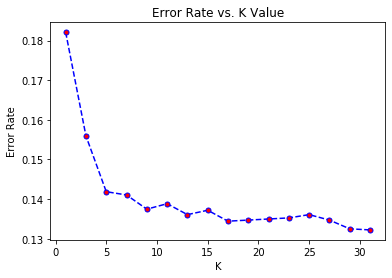

In [90]:
# Identify the best value for K using the elbow method
# The elbow method plots the error rate of a range of K values
error_rate = []

# Set the range of potential K values
# Run KNN for each K in the range
for i in range(1,32,2):
   
    knn = KNeighborsClassifier(n_neighbors = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a K value
plt.plot(range(1,32,2), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [91]:
#K value chosen is 7
#Means K value we have to choose is as low as possible which reduces the error

In [ ]:
#Now let's test the P value for 1 and 2

In [ ]:
error_rate = []

# Set the range of potential P values
# Run KNN for each P in the range
for i in range(1,3):
   
    knn = KNeighborsClassifier(n_neighbors = 7, p = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a P value
plt.plot(range(1,3), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. P Value')
plt.xlabel('P')
plt.ylabel('Error Rate')
plt.show()

In [92]:
#using default Paramters
# Build the Decision Tree Model
knn = KNeighborsClassifier(n_neighbors = 5, # Default 5
                           weights = 'uniform', # Default uniform
                           metric = 'minkowski', # Default minkowski
                           p = 2 # Default 2
                          )

# Train the model on the training set
fit = knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(knn, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

print ("Model Accuracy: ",str(round(acc*100,2))+"%")
print ("Cross Validation Accuracy: ",str(round(cvm*100,2))+"%")
print ("Model Fitting: ",str(round(dif*100,2))+"%",underover)
print ("Error Rate: ",str(round(err*100, 2))+"%")
print ("\n\n\nConfusion Matrix: \n\n",cm)
print ("\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

Model Accuracy:  85.81%
Cross Validation Accuracy:  85.79%
Model Fitting:  0.02% Overfitted
Error Rate:  14.19%



Confusion Matrix: 

 [[ 514    4    0  173]
 [   0 1075    0  102]
 [   0    0  407    0]
 [ 124  112    0 1119]]



Classification Report:

               precision    recall  f1-score   support

    Attacker       0.81      0.74      0.77       691
    Defender       0.90      0.91      0.91      1177
  Goalkeeper       1.00      1.00      1.00       407
  Midfielder       0.80      0.83      0.81      1355

    accuracy                           0.86      3630
   macro avg       0.88      0.87      0.87      3630
weighted avg       0.86      0.86      0.86      3630



In [93]:
#now with fine tune parameters

In [95]:
# Build the Decision Tree Model
knn = KNeighborsClassifier(n_neighbors = 7, # Default 5
                           weights = 'uniform', # Default uniform
                           metric = 'minkowski', # Default minkowski
                           p = 2 # Default 2
                          )

# Train the model on the training set
fit = knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(knn, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

print ("Model Accuracy: ",str(round(acc*100,2))+"%")
print ("Cross Validation Accuracy: ",str(round(cvm*100,2))+"%")
print ("Model Fitting: ",str(round(dif*100,2))+"%",underover)
print ("Error Rate: ",str(round(err*100, 2))+"%")
print ("\n\n\nConfusion Matrix: \n\n",cm)
print ("\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

Model Accuracy:  85.9%
Cross Validation Accuracy:  86.48%
Model Fitting:  -0.59% Underfitted
Error Rate:  14.1%



Confusion Matrix: 

 [[ 520    3    0  168]
 [   0 1066    0  111]
 [   0    0  406    1]
 [ 120  109    0 1126]]



Classification Report:

               precision    recall  f1-score   support

    Attacker       0.81      0.75      0.78       691
    Defender       0.90      0.91      0.91      1177
  Goalkeeper       1.00      1.00      1.00       407
  Midfielder       0.80      0.83      0.82      1355

    accuracy                           0.86      3630
   macro avg       0.88      0.87      0.88      3630
weighted avg       0.86      0.86      0.86      3630



In [96]:
'''Outcome:
Tuning the model improves performance in all areas as seen by the output

KNN Outcome:
The best performing model was the one built on the 80% training set based on the output of each model.

Model Outcome:
KNN clearly outperforms the Decision Tree Classifier Model in Precision, Recall, F1-Score and Error 
Rate for all Positions apart from Goalkeeper, which received a perfect score in both models. The KNN 
model’s error rate is also approximately 5% lower than the Decision Tree Classifier. The recall for 
Attacker on both models was the worst performing metric. This indicates that Attacker was the most
incorrectly labelled position. Between 22% and 26% of attackers were labelled as Midfielders.

Discussion
KNN is the Winner
The KNN model performs very well. When comparing the model’s accuracy to the cross-validation accuracy,
there is only a difference of +0.82% indicating that the model is well fitted. The KNN model works well
due to being able to differentiate clear clusters of Positions within the features.
This can be seen in the Methodology section where a scatter plot of Finishing Vs SlidingTackle by
Position clearly shows 4 distinct clusters.

Midfielders are a Jack of all Trades
The hardest Position to predict from both models was the Midfielder. Midfielders can range from great defenders 
to great attackers and everything in between. This can be seen in the confusion matrix for both models where
Midfielders were incorrectly classified as Attackers and Defenders. Attackers and Defenders were also incorrectly
classified as Midfielders.

Dataset Spans Varying Player Quality
The Decision Tree Classifier may have performed worse because the quality of the 18,000+ players in the dataset
range from world class to low tier professional. A defender in a low tier league, may have less defensive ratings 
than a world class attacker. If all players in the dataset were from the same league, or same quality of leagues,
then the model’s performance may have been improved.

Conclusion
It is possible to predict a player’s Position when only given their ratings at different skills relating
to football. A K Nearest Neighbor Data Model is suitable and accurate with an error rate of 12.37%. 
This model could be used for teams to better fit their players based on how they are rated at various
football skills. Likewise, it could determine if a team can be used more effectively by not having players
play ‘out of position’. This can occur due to coaches having certain perceptions of players that are not 
backed up with data. This model could be further evaluated by only using a small number of selected features.
This was highlighted in the Methodology section when comparing different attributes and their relationship
to Position. If the model could be reduced to a much smaller number of features, while retaining a high accuracy
, this could allow football clubs to develop a procedure to analyse a player quickly and recommend an effective
position.
'''

'Outcome:\nTuning the model improves performance in all areas as seen by the output\n\nKNN Outcome:\nThe best performing model was the one built on the 80% training set based on the output of each model.\n\nModel Outcome:\nKNN clearly outperforms the Decision Tree Classifier Model in Precision, Recall, F1-Score and Error \nRate for all Positions apart from Goalkeeper, which received a perfect score in both models. The KNN \nmodel’s error rate is also approximately 5% lower than the Decision Tree Classifier. The recall for \nAttacker on both models was the worst performing metric. This indicates that Attacker was the most\nincorrectly labelled position. Between 22% and 26% of attackers were labelled as Midfielders.\n\nDiscussion\nKNN is the Winner\nThe KNN model performs very well. When comparing the model’s accuracy to the cross-validation accuracy,\nthere is only a difference of +0.82% indicating that the model is well fitted. The KNN model works well\ndue to being able to differentia